## Practical Work 2

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Note: you can choose any suitable stop criteria.

In [2]:
# Linear Regression Model
import numpy as np
from numpy.linalg import norm
# h(x)=theta_0+theta_1*x
x_points=np.linspace(0,20,50).reshape(50,1)
y_points=-2*x_points+1
#hypothes to equation with theta_o value=10 and  theta_1=10

def calc(theta_0,theta_1):
    y_pred=theta_0+theta_1*x_points

    loss_function=1/ (2*y_pred.shape[0])*((y_pred-y_points)**2).sum()    
    return (loss_function,y_pred)
    
def Batch(x_points,y_points,alpha,max_iter):
    theta_0=1
    theta_1=1
    loss_function,y_pred=calc(theta_0,theta_1)

    iter=0
    iter_lst=[]
    loss_function_lst=[]
    theta0_lst=[]
    theta1_lst=[]

    while iter<max_iter:
        alpha=alpha
        theta0_lst.append(theta_0) #make a list of theta zer0 to make our plot with loss function
        theta1_lst.append(theta_1) #make a list of thta one to make our plot
        theta_0=theta_0-alpha*(1/y_pred.shape[0])*((y_pred-y_points).sum())
        theta_1=theta_1-alpha*(1/y_pred.shape[0])*((y_pred-y_points)*x_points).sum()
        loss_function,y_pred=calc(theta_0,theta_1)
        ######################3
        iter_lst.append(iter)
        loss_function_lst.append(loss_function)
        #############################3A
        theta0_lst.append(theta_0)
        theta1_lst.append(theta_1)
        ############################
        
        iter+=1
        if loss_function<.001:
            break
    return theta_0,theta_1,loss_function,theta0_lst,theta1_lst,loss_function_lst
theta_0,theta_1,loss_function,lst0,lst1,lst3=Batch(x_points,y_points,.01,2000)
print(f"theta_0 is {theta_0},theta_1 is {theta_1},loss_function is {loss_function}")    

y_pred1=theta_0+theta_1*x_points
print(y_pred1)


theta_0 is 0.9120818879539632,theta_1 is -1.9934603090276992,loss_function is 0.0009954884874703038
[[  0.91208189]
 [  0.09842462]
 [ -0.71523265]
 [ -1.52888992]
 [ -2.34254719]
 [ -3.15620446]
 [ -3.96986173]
 [ -4.78351899]
 [ -5.59717626]
 [ -6.41083353]
 [ -7.2244908 ]
 [ -8.03814807]
 [ -8.85180534]
 [ -9.66546261]
 [-10.47911988]
 [-11.29277715]
 [-12.10643442]
 [-12.92009168]
 [-13.73374895]
 [-14.54740622]
 [-15.36106349]
 [-16.17472076]
 [-16.98837803]
 [-17.8020353 ]
 [-18.61569257]
 [-19.42934984]
 [-20.24300711]
 [-21.05666437]
 [-21.87032164]
 [-22.68397891]
 [-23.49763618]
 [-24.31129345]
 [-25.12495072]
 [-25.93860799]
 [-26.75226526]
 [-27.56592253]
 [-28.3795798 ]
 [-29.19323706]
 [-30.00689433]
 [-30.8205516 ]
 [-31.63420887]
 [-32.44786614]
 [-33.26152341]
 [-34.07518068]
 [-34.88883795]
 [-35.70249522]
 [-36.51615249]
 [-37.32980975]
 [-38.14346702]
 [-38.95712429]]


#### Try your function with any input parameterss of your choice.

#### Calculate r2 score

In [3]:
from sklearn.metrics import r2_score
R2=r2_score(y_true=y_points.reshape(50,1),y_pred=y_pred1.reshape(50,1))
print(R2)

0.9999856532541511


#### Plot loss vs. epochs

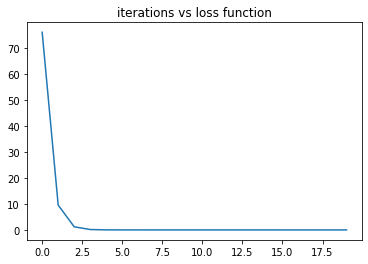

In [4]:
#iterations versus the loss function untill reaching the min value of loss function
plt.plot(lst3[0:20])
plt.title("iterations vs loss function")
plt.show()


#### Plot Theta_0 vs. loss and Theta_1 vs. loss

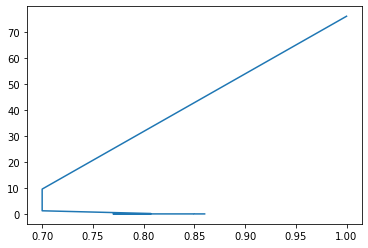

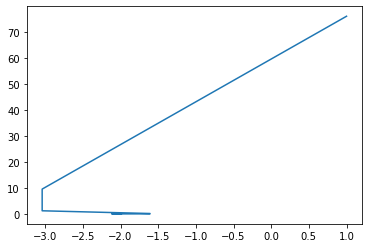

In [5]:
plt.plot(lst0[0:361],lst3[0:361])
plt.show()
#######33
plt.plot(lst1[0:361],lst3[0:361])
plt.show()

#### Plot all regression lines till converge

0.7


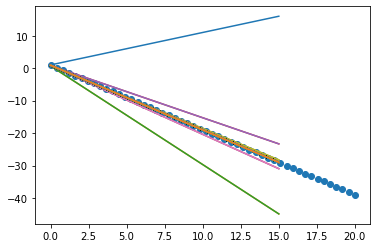

In [6]:
plt.scatter(x_points,y_points)
ax=np.linspace(0,15)
print(lst0[1])
for i in range(len(lst0)):
    
    plt.plot(ax,lst0[i]+lst1[i]*ax)

#### Plot the best regression line

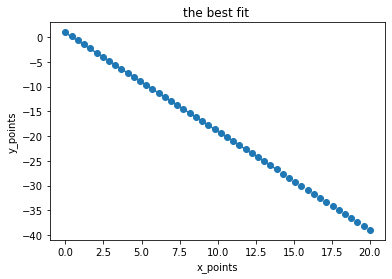

In [7]:
import matplotlib.pyplot as plt
ax=range(0,15)
plt.scatter(x_points,y_points)
plt.plot(ax,theta_0+theta_1*ax)
plt.xlabel("x_points")
plt.ylabel("y_points")
plt.title("the best fit ")
plt.show()

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

In [8]:
th0,th1,loss_funct,lst0,lst1,lst3=Batch(x_points,y_points,.001,20000)

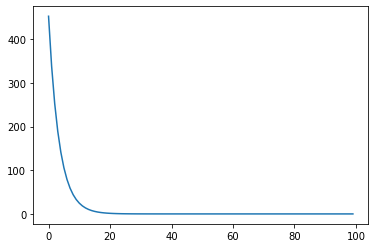

In [9]:
plt.plot(lst3[0:100])

0.97


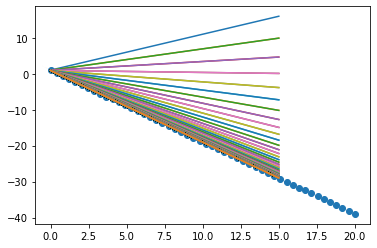

In [10]:
plt.scatter(x_points,y_points)
ax=np.linspace(0,15)
print(lst0[1])
for i in range(len(lst0)):
    
    plt.plot(ax,lst0[i]+lst1[i]*ax)

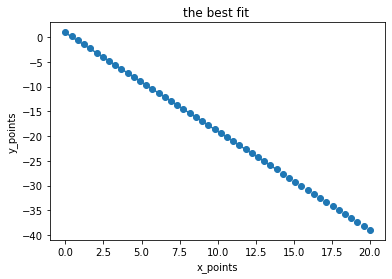

In [11]:
import matplotlib.pyplot as plt
ax=range(0,15)
plt.scatter(x_points,y_points)
plt.plot(ax,th0+th1*ax)
plt.xlabel("x_points")
plt.ylabel("y_points")
plt.title("the best fit ")
plt.show()

In [12]:
print(x_points)

[[ 0.        ]
 [ 0.40816327]
 [ 0.81632653]
 [ 1.2244898 ]
 [ 1.63265306]
 [ 2.04081633]
 [ 2.44897959]
 [ 2.85714286]
 [ 3.26530612]
 [ 3.67346939]
 [ 4.08163265]
 [ 4.48979592]
 [ 4.89795918]
 [ 5.30612245]
 [ 5.71428571]
 [ 6.12244898]
 [ 6.53061224]
 [ 6.93877551]
 [ 7.34693878]
 [ 7.75510204]
 [ 8.16326531]
 [ 8.57142857]
 [ 8.97959184]
 [ 9.3877551 ]
 [ 9.79591837]
 [10.20408163]
 [10.6122449 ]
 [11.02040816]
 [11.42857143]
 [11.83673469]
 [12.24489796]
 [12.65306122]
 [13.06122449]
 [13.46938776]
 [13.87755102]
 [14.28571429]
 [14.69387755]
 [15.10204082]
 [15.51020408]
 [15.91836735]
 [16.32653061]
 [16.73469388]
 [17.14285714]
 [17.55102041]
 [17.95918367]
 [18.36734694]
 [18.7755102 ]
 [19.18367347]
 [19.59183673]
 [20.        ]]


In [13]:
print(y_points)


[[  1.        ]
 [  0.18367347]
 [ -0.63265306]
 [ -1.44897959]
 [ -2.26530612]
 [ -3.08163265]
 [ -3.89795918]
 [ -4.71428571]
 [ -5.53061224]
 [ -6.34693878]
 [ -7.16326531]
 [ -7.97959184]
 [ -8.79591837]
 [ -9.6122449 ]
 [-10.42857143]
 [-11.24489796]
 [-12.06122449]
 [-12.87755102]
 [-13.69387755]
 [-14.51020408]
 [-15.32653061]
 [-16.14285714]
 [-16.95918367]
 [-17.7755102 ]
 [-18.59183673]
 [-19.40816327]
 [-20.2244898 ]
 [-21.04081633]
 [-21.85714286]
 [-22.67346939]
 [-23.48979592]
 [-24.30612245]
 [-25.12244898]
 [-25.93877551]
 [-26.75510204]
 [-27.57142857]
 [-28.3877551 ]
 [-29.20408163]
 [-30.02040816]
 [-30.83673469]
 [-31.65306122]
 [-32.46938776]
 [-33.28571429]
 [-34.10204082]
 [-34.91836735]
 [-35.73469388]
 [-36.55102041]
 [-37.36734694]
 [-38.18367347]
 [-39.        ]]


#### Update the implementation of the Batch GD to be Mini-Batch and rpeat the above plots and evaluations
#### Change batch size and see the effect

In [25]:
# Linear Regression Model
import numpy as np
from numpy.linalg import norm
# h(x)=theta_0+theta_1*x
x_points=np.linspace(0,20,50).reshape(50,1)
y_points=-2*x_points+1
#hypothes to equation with theta_o value=10 and  theta_1=10

def calc(theta_0,theta_1,xpoints,ypoints):
    y_pred=theta_0+theta_1*xpoints

    loss_function=1/ (2*y_pred.shape[0])*((y_pred-ypoints)**2).sum()    
    return (loss_function,y_pred)
    
def MiniBatch(x_points,y_points,alpha,max_iter,batch_size):
    theta_0=1
    theta_1=1
    iter=0
    iter_lst=[]
    loss_function_lst=[]
    theta0_lst=[]
    theta1_lst=[]

    while iter<max_iter:
        alpha=alpha
        for j in range(int(y_points.shape[0]/batch_size)):    
            xpoints=x_points[j*batch_size:j*batch_size+batch_size]
            ypoints=y_points[j*batch_size:j*batch_size+batch_size]
            loss_function,y_pred=calc(theta_0,theta_1,xpoints,ypoints)
            
            theta_0=theta_0-alpha*(1/ypoints.shape[0])*((y_pred-ypoints).sum())
            theta_1=theta_1-alpha*(1/ypoints.shape[0])*((y_pred-ypoints)*xpoints).sum()
            
            ######################3
            iter_lst.append(iter)
            
            #############################3A
            theta0_lst.append(theta_0)
            theta1_lst.append(theta_1)
            ############################
            loss_function_lst.append(loss_function)
        iter+=1
        if loss_function<.001:
               break
    return theta_0,theta_1,loss_function,theta0_lst,theta1_lst,loss_function_lst
theta_0,theta_1,loss_function,lst0,lst1,lst3=MiniBatch(x_points,y_points,.00001,100000,5)
print(f"theta_0 is {theta_0},theta_1 is {theta_1},loss_function is {loss_function}")    

y_pred1=theta_0+theta_1*x_points
print(y_pred1)


theta_0 is 0.8956306167365714,theta_1 is -1.9922485767123426,loss_function is 0.0009999827268666224
[[  0.89563062]
 [  0.08246793]
 [ -0.73069475]
 [ -1.54385744]
 [ -2.35702012]
 [ -3.17018281]
 [ -3.98334549]
 [ -4.79650817]
 [ -5.60967086]
 [ -6.42283354]
 [ -7.23599623]
 [ -8.04915891]
 [ -8.8623216 ]
 [ -9.67548428]
 [-10.48864696]
 [-11.30180965]
 [-12.11497233]
 [-12.92813502]
 [-13.7412977 ]
 [-14.55446039]
 [-15.36762307]
 [-16.18078576]
 [-16.99394844]
 [-17.80711112]
 [-18.62027381]
 [-19.43343649]
 [-20.24659918]
 [-21.05976186]
 [-21.87292455]
 [-22.68608723]
 [-23.49924991]
 [-24.3124126 ]
 [-25.12557528]
 [-25.93873797]
 [-26.75190065]
 [-27.56506334]
 [-28.37822602]
 [-29.19138871]
 [-30.00455139]
 [-30.81771407]
 [-31.63087676]
 [-32.44403944]
 [-33.25720213]
 [-34.07036481]
 [-34.8835275 ]
 [-35.69669018]
 [-36.50985286]
 [-37.32301555]
 [-38.13617823]
 [-38.94934092]]


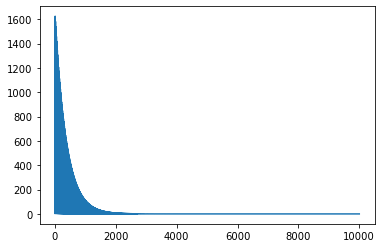

In [26]:
plt.plot(lst3[0:10000])
#print(lst3[0:100])

## Stochastic GD

#### Update the implementation of the Batch GD to beStochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to Batch and Mini-Batch GD

In [20]:
# Linear Regression Model
import numpy as np
from numpy.linalg import norm
# h(x)=theta_0+theta_1*x
x_points=np.linspace(0,20,50).reshape(50,1)
y_points=-2*x_points+1
#hypothes to equation with theta_o value=10 and  theta_1=10

def calc(theta_0,theta_1,xpoints,ypoints):
    y_pred=theta_0+theta_1*xpoints

    loss_function=1/ (2*y_pred.shape[0])*((y_pred-ypoints)**2).sum()    
    return (loss_function,y_pred)
    
def StochasticBatch(x_points,y_points,alpha,max_iter,batch_size):
    theta_0=1
    theta_1=1
    iter=0
    iter_lst=[]
    loss_function_lst=[]
    theta0_lst=[]
    theta1_lst=[]

    while iter<max_iter:
        alpha=alpha
        for j in range(int(y_points.shape[0]/batch_size)):    
            xpoints=x_points[j*batch_size:j*batch_size+batch_size]
            ypoints=y_points[j*batch_size:j*batch_size+batch_size]
            loss_function,y_pred=calc(theta_0,theta_1,xpoints,ypoints)
            
            theta_0=theta_0-alpha*(1/ypoints.shape[0])*((y_pred-ypoints).sum())
            theta_1=theta_1-alpha*(1/ypoints.shape[0])*((y_pred-ypoints)*xpoints).sum()
            
            ######################3
            iter_lst.append(iter)
            
            #############################3A
            theta0_lst.append(theta_0)
            theta1_lst.append(theta_1)
            ############################
            loss_function_lst.append(loss_function)
        iter+=1
        if loss_function<.001:
               break
    return theta_0,theta_1,loss_function,theta0_lst,theta1_lst,loss_function_lst
theta_0,theta_1,loss_function,lst0,lst1,lst3=StochasticBatch(x_points,y_points,.00001,100000,1)
print(f"theta_0 is {theta_0},theta_1 is {theta_1},loss_function is {loss_function}")    

y_pred1=theta_0+theta_1*x_points
print(y_pred1)


theta_0 is 0.906682081295283,theta_1 is -1.9931071380929053,loss_function is 0.00099987843486572
[[  0.90668208]
 [  0.09316896]
 [ -0.72034415]
 [ -1.53385727]
 [ -2.34737039]
 [ -3.16088351]
 [ -3.97439662]
 [ -4.78790974]
 [ -5.60142286]
 [ -6.41493598]
 [ -7.22844909]
 [ -8.04196221]
 [ -8.85547533]
 [ -9.66898845]
 [-10.48250156]
 [-11.29601468]
 [-12.1095278 ]
 [-12.92304092]
 [-13.73655404]
 [-14.55006715]
 [-15.36358027]
 [-16.17709339]
 [-16.99060651]
 [-17.80411962]
 [-18.61763274]
 [-19.43114586]
 [-20.24465898]
 [-21.05817209]
 [-21.87168521]
 [-22.68519833]
 [-23.49871145]
 [-24.31222456]
 [-25.12573768]
 [-25.9392508 ]
 [-26.75276392]
 [-27.56627703]
 [-28.37979015]
 [-29.19330327]
 [-30.00681639]
 [-30.8203295 ]
 [-31.63384262]
 [-32.44735574]
 [-33.26086886]
 [-34.07438198]
 [-34.88789509]
 [-35.70140821]
 [-36.51492133]
 [-37.32843445]
 [-38.14194756]
 [-38.95546068]]


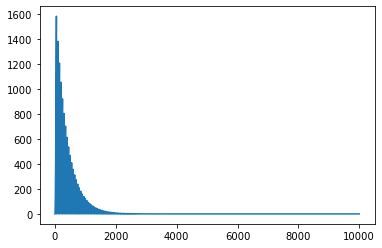

In [24]:
plt.plot(lst3[0:10000])